In [33]:
import pandas as pd
import numpy as np

In [34]:
#reading data
data = pd.read_csv(r"C:\Users\GU44DR\Telco_customer_churn.csv", sep=',')

In [35]:
data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices


In [36]:
data.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [37]:
# Deleting not needed columns
DeleteList=['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code', 'Gender','Lat Long', 'Latitude', 'Longitude', 'Churn Label', 'Churn Score', 'CLTV', 'Churn Reason','Total Charges']
data=data.drop(DeleteList, axis=1)

In [38]:
# split predictors based on dtype
X_num = data.select_dtypes(exclude='object')
X_cat= data.select_dtypes(include='object')

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.Partner = le.fit_transform(data.Partner)
data.Dependents = le.fit_transform(data.Dependents)
data['Senior Citizen'] = le.fit_transform(data['Senior Citizen'])
data['Phone Service'] = le.fit_transform(data['Phone Service'])
data['Phone Service'] = le.fit_transform(data['Phone Service'])
data['Multiple Lines'] = le.fit_transform(data['Multiple Lines'])
data['Online Security'] = le.fit_transform(data['Online Security'])
data['Online Backup'] = le.fit_transform(data['Online Backup'])
data['Device Protection'] = le.fit_transform(data['Device Protection'])
data['Tech Support'] = le.fit_transform(data['Tech Support'])
data['Streaming TV'] = le.fit_transform(data['Streaming TV'])
data['Streaming Movies'] = le.fit_transform(data['Streaming Movies'])
data['Paperless Billing'] = le.fit_transform(data['Paperless Billing'])

In [40]:
data['Internet Service'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [41]:
#calculating frequencies of the variables - gender variable
freq_gndr=pd.crosstab(index=data['Internet Service'], columns='count')
freq_gndr

col_0,count
Internet Service,
DSL,2421
Fiber optic,3096
No,1526


In [42]:
data['Internet Service'] = np.where(np.isin(data['Internet Service'],['DSL','Fiber optic']),1,0)

In [43]:
data['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [44]:
#calculating frequencies of the variables - gender variable
freq_gndr=pd.crosstab(index=data['Payment Method'], columns='count')
freq_gndr

col_0,count
Payment Method,
Bank transfer (automatic),1544
Credit card (automatic),1522
Electronic check,2365
Mailed check,1612


In [45]:
# one hot encoding of categorical variables
dummies1= pd.get_dummies(data['Payment Method'],drop_first=False)

In [46]:
# Combine standardized and one hot encoded
data=data.join(dummies1)

In [47]:
data=data.drop(['Payment Method'],axis=1)

In [48]:
#calculating frequencies of the variables - gender variable
freq_gndr=pd.crosstab(index=data['Contract'], columns='count')
freq_gndr

col_0,count
Contract,
Month-to-month,3875
One year,1473
Two year,1695


In [49]:
data['Contract'] = np.where(np.isin(data['Contract'],['One year','Two year']),1,0)

In [50]:
missings = data.isnull().sum().sum()
missings

0

In [51]:
data.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Monthly Charges', 'Churn Value', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Electronic check', 'Mailed check'],
      dtype='object')

In [52]:
# Standardize numerical data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num=data[['Tenure Months','Monthly Charges']]
scaler.fit(X_num)
X_num_sd = scaler.transform(X_num)
X_num_sd = pd.DataFrame(X_num_sd,columns=X_num.columns)
X_num_sd.describe()

,Tenure Months,Monthly Charges
count,7.043000e+03,7.043000e+03
mean,-1.614182e-17,-5.649637e-17
std,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00
25%,-9.516817e-01,-9.725399e-01
50%,-1.372744e-01,1.857327e-01
75%,9.214551e-01,8.338335e-01
max,1.613701e+00,1.794352e+00


In [53]:
data=data.drop(['Tenure Months','Monthly Charges'], axis=1)

In [54]:
# Combine standardized and one hot encoded
data=data.join(X_num_sd)

In [55]:
# split into train test set
from sklearn.model_selection import train_test_split
X = data[['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing','Bank transfer (automatic)', 'Credit card (automatic)',
       'Electronic check', 'Mailed check', 'Tenure Months', 'Monthly Charges']]
y = data[['Churn Value']]
X_train,X_test,y_train,y_test = \
train_test_split(X,y,test_size=.3,random_state=123)

# Define function to comput rmse
from sklearn.metrics import mean_squared_error
def rmse(true,pred):
    return mean_squared_error(true,pred)**.5

In [56]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn.metrics import accuracy_score

In [57]:
clf= tree.DecisionTreeClassifier(max_depth =5)
clf = clf.fit(X_train, y_train)

In [58]:
dtree = tree.DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=gini', accuracy_score(y_test, pred))
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=gini 0.7283483199242783
Criterion=entropy 0.7359204921911974


In [59]:
import matplotlib.pyplot as plt
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(accuracy_score(y_test, pred))
    ####
    dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(accuracy_score(y_test, pred))
 ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})


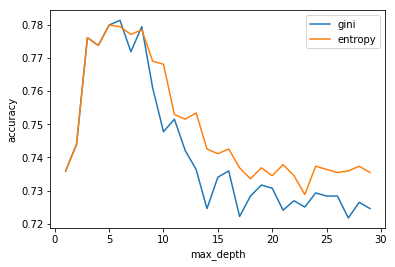

In [60]:
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [61]:
dtree = tree.DecisionTreeClassifier(criterion='gini', max_depth=6)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_train)
print('Criterion=entropy', accuracy_score(y_train, pred))


Criterion=entropy 0.8144016227180527


In [62]:
pred = dtree.predict(X_test)
print('Criterion=entropy', accuracy_score(y_test, pred))

Criterion=entropy 0.7813535257927118


[Text(0.6100543478260869, 0.9285714285714286, 'X[12] <= 0.5\ngini = 0.39\nsamples = 4930\nvalue = [3619, 1311]'),
 Text(0.34782608695652173, 0.7857142857142857, 'X[19] <= 0.122\ngini = 0.49\nsamples = 2712\nvalue = [1551, 1161]'),
 Text(0.17391304347826086, 0.6428571428571429, 'X[18] <= -1.094\ngini = 0.409\nsamples = 1149\nvalue = [819, 330]'),
 Text(0.08695652173913043, 0.5, 'X[5] <= 0.5\ngini = 0.485\nsamples = 509\nvalue = [298, 211]'),
 Text(0.043478260869565216, 0.35714285714285715, 'X[18] <= -1.257\ngini = 0.358\nsamples = 193\nvalue = [148, 45]'),
 Text(0.021739130434782608, 0.21428571428571427, 'X[19] <= -1.513\ngini = 0.429\nsamples = 106\nvalue = [73, 33]'),
 Text(0.010869565217391304, 0.07142857142857142, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.03260869565217391, 0.07142857142857142, 'gini = 0.447\nsamples = 98\nvalue = [65, 33]'),
 Text(0.06521739130434782, 0.21428571428571427, 'X[19] <= -1.299\ngini = 0.238\nsamples = 87\nvalue = [75, 12]'),
 Text(0.0543478260

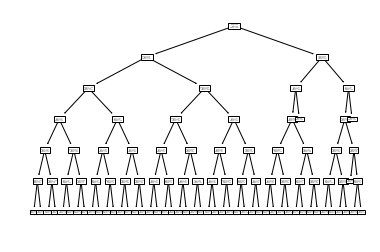

In [63]:
tree.plot_tree(dtree)

In [64]:
import graphviz
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph

ModuleNotFoundError: No module named 'graphviz'

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf = RandomForestRegressor(n_estimators=40,n_jobs=12)
rf.fit(X_train,y_train)

print("Train", rmse(y_train,rf.predict(X_train)))
print("Test", rmse(y_test,rf.predict(X_test)))

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_30564\1505746643.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


Train 0.15010641179731907
Test 0.38580945361246133


In [ ]:
rf.estimators_

[DecisionTreeRegressor(max_features='auto', random_state=363891797),
 DecisionTreeRegressor(max_features='auto', random_state=2146406611),
 DecisionTreeRegressor(max_features='auto', random_state=561941463),
 DecisionTreeRegressor(max_features='auto', random_state=1192525637),
 DecisionTreeRegressor(max_features='auto', random_state=1069536212),
 DecisionTreeRegressor(max_features='auto', random_state=351757473),
 DecisionTreeRegressor(max_features='auto', random_state=2007707978),
 DecisionTreeRegressor(max_features='auto', random_state=1063323694),
 DecisionTreeRegressor(max_features='auto', random_state=1040330575),
 DecisionTreeRegressor(max_features='auto', random_state=417114174),
 DecisionTreeRegressor(max_features='auto', random_state=1395110916),
 DecisionTreeRegressor(max_features='auto', random_state=1551789199),
 DecisionTreeRegressor(max_features='auto', random_state=2046517327),
 DecisionTreeRegressor(max_features='auto', random_state=268904149),
 DecisionTreeRegressor(ma

In [ ]:
# Tuning RF
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor(n_jobs=12)

params={"n_estimators": [50,100,300],
       'max_depth': [5,8,10],
       'min_samples_split': [5,10,30]}

tuning = GridSearchCV(rf,
                      param_grid=params,
                     cv=5,
                     n_jobs=12,
                     verbose=1)

tuning.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\ProgramData\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=12), n_jobs=12,
             param_grid={'max_depth': [5, 8, 10],
                         'min_samples_split': [5, 10, 30],
                         'n_estimators': [50, 100, 300]},
             verbose=1)

In [ ]:
tuning.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_split=30, n_jobs=12)

In [ ]:
print("Train", rmse(y_train,tuning.predict(X_train)))
print("Test", rmse(y_test,tuning.predict(X_test)))

Train 0.32974467991907286
Test 0.36570787464992277


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=700,learning_rate=.1)

In [ ]:
gbm.fit(X_train,y_train)

print("Train", rmse(y_train,gbm.predict(X_train)))
print("Test", rmse(y_test,gbm.predict(X_test)))

c:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train 0.2920191302003345
Test 0.3764976079401596


In [ ]:
importance = pd.DataFrame({
    "variable": X_train.columns,
    "importance": gbm.feature_importances_})

In [ ]:
importance.sort_values("importance",ascending=False)

,variable,importance
19,Monthly Charges,0.303099
12,Contract,0.268425
18,Tenure Months,0.190715
2,Dependents,0.063985
16,Electronic check,0.042894
5,Internet Service,0.035044
13,Paperless Billing,0.014556
6,Online Security,0.013513
9,Tech Support,0.010778
0,Senior Citizen,0.010769


c:\ProgramData\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


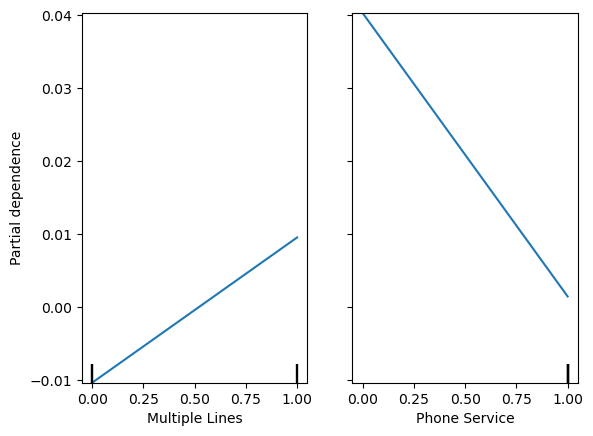

In [ ]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(gbm,X_test,[4,3])

In [ ]:
#XGBoost

In [ ]:
X_train_new,X_validation_new,y_train_new,y_validation_new = \
train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
import xgboost

In [ ]:
train_xgb=xgboost.DMatrix(X_train_new,y_train_new)
validation_xgb=xgboost.DMatrix(X_validation_new,y_validation_new)

test_xgb=xgboost.DMatrix(X_test,y_test)

In [ ]:
xgb_results={}
xgb  = xgboost.train(params={'max_depth': 5,
                            'eta': .04,
                            'tree_method': "gpu_hist"},
                    dtrain=train_xgb,
                    num_boost_round=2000,
                    evals=[(train_xgb,"train"), (validation_xgb, "validation")],
                    early_stopping_rounds = 10,
                    evals_result = xgb_results)

[16:42:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:339: No visible GPU is found, setting `gpu_id` to -1


XGBoostError: [16:42:56] C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/gbm/gbtree.cc:611: Check failed: common::AllVisibleGPUs() >= 1 (0 vs. 1) : No visible GPU is found for XGBoost.

In [ ]:
rmse(y_test,xgb.predict(test_xgb))

NameError: name 'xgb' is not defined